# PHYS465: introduction to clustering

There are a lot of libraries that focus on machine learning in python. 

A key one that we will introduce this week is `scikit-learn` (https://scikit-learn.org/stable/). This has a lot of functionality. This week focuses on the clustering and classification algorithms

<img width=200 src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" alt="scikit-learn"/>
***

## Get started - creating this weeks dataset

In [1]:
# First import our libraries of interest
import numpy as np
import matplotlib.pyplot as plt
# Jupyter specific call to plot inline
%matplotlib inline

### _An aside_ Random number generation
numpy has lots of inbuilt functions to generate random numbers. we can use this to sample distributions and generate fake data to test our codes on. 

In [2]:
# To ensure that we will recover the same result if we run the code first, we set a seed
_      = np.random.seed(323)

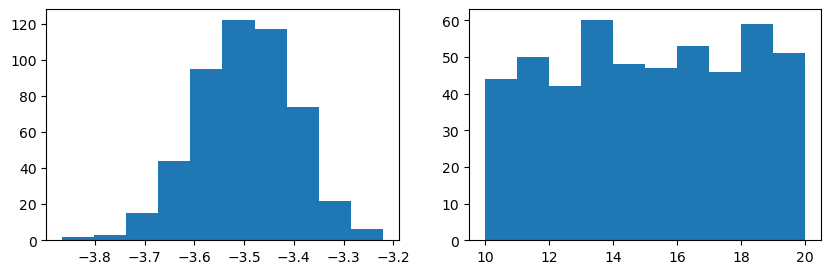

In [3]:
# Generate n_points:
n_pts      = 500
# 1. from a normal distribution with a given mean and standard deviation
mean       = -3.5
sigma      = 0.1
fake_norm  = np.random.normal(loc=mean, scale=sigma, size=n_pts)
# 2. from a uniform distribution with lower and upper limit
min_val    = 10
max_val    = 20
fake_line  = np.random.uniform(low=min_val, high=max_val, size=n_pts)

# --- #
fig, axs  = plt.subplots(ncols=2, nrows=1, figsize=(10, 3))
_         = axs[0].hist(fake_norm)
_         = axs[1].hist(fake_line)

### Generate this week's dataset
 * 5 datasets with different (x, y, sigma) values
 * 2 of the datasets are concentric circles

In [4]:
n_pts = 50
# ---- #
# Samples 1 & 2
# ---- #
x1    = np.random.normal(-3.5, 0.1, size=n_pts)
y1    = np.random.normal( 1., 1.0, size=n_pts)
x2    = np.random.normal( 3.5, 0.1, size=n_pts)
y2    = np.random.normal( 1., 1.0, size=n_pts)
# ---- #
# Samples 3 & 4
# * drawn together and then separated
# ---- #
xtemp = np.random.normal( 0., 0.75, size=n_pts*2)
ytemp = np.random.normal( 0., 0.75, size=n_pts*2)
rad1  = np.sqrt(xtemp**2 + ytemp**2)
i_r   = np.argsort(rad1)
# Artificially assign datasets 3 and 4 based on location
x3    = xtemp[i_r[:n_pts]]
y3    = ytemp[i_r[:n_pts]]
x4    = xtemp[i_r[n_pts:]]
y4    = ytemp[i_r[n_pts:]]
# ---- #
# Samples 5
# * drawn by adding noise to a quadratic equation
# ---- #
x5    = np.linspace(-3.25, 3.25, n_pts)
y5    = (x5/2.)**2 - 4 + np.random.normal(0., 0.5, n_pts)

### Combine all datasets into one: 
 * this is what we will actually observe

In [5]:
x_all      = np.append(x1, [x2, x3, x4, x5])
y_all      = np.append(y1, [y2, y3, y4, y5])
data_u     = np.array([x_all, y_all])

### Determine a 'truth' array
 * We can do this with `np.ones_like()` functionality:
   * this makes an array of 1's matching the properties of an array
 * NB: there is also a `np.zeros_like()` for creating arrays of zeros

In [6]:
label_ones = np.ones_like(x1).astype(int)
labels     = np.append(label_ones, [label_ones+1, label_ones+2,
                                    label_ones+3, label_ones+4])

<font color='blue'>Summary:</font>
   * Our simulated dataset is in `data_u`
   * It contains 5 different 'types' of events.
   * The truth table is called `labels`
***

### Plotting
 * to plot multiple different datasets we can create lists and loop through them
 * NB: if the colors and markers have different lengths, then a loop will introduce unique combinations
 * `matplotlib` has a wealth of colours and marker styles : google is your friend!
 * NB: there are specific colour-blind friendly colourmaps. See the documentation.
  * Considering different marker types should help with this

In [7]:
# colours and marker styles to cycle through below
plotcol  = ["firebrick", "seagreen", "mediumblue", "darkgoldenrod", "darkorchid",
           "saddlebrown", "slategray", "teal", "peru", "steelblue", "olive", "plum",
           "yellowgreen", "lightcoral", "limegreen", "thistle", "indigo", "black"]
plotmark = ["o", "^", "s", "+", "d", "*", "h", "v", "p", "<", "D", ">"]


#### Plot the observations next to the ground truth

Here's our randomly generated data with "ground truth" labels:


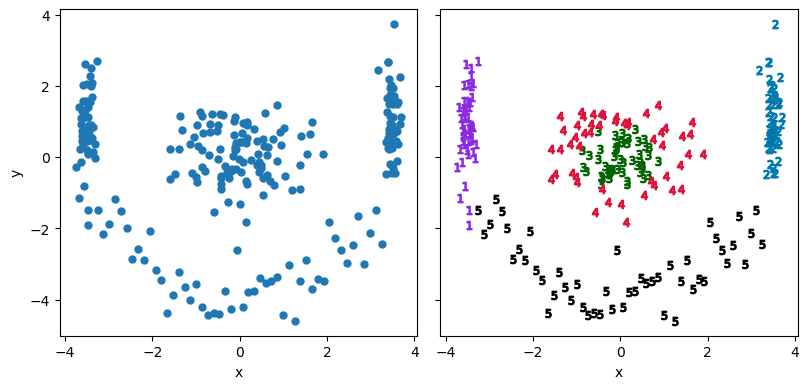

In [8]:
# quite small: this means the fonts will be readable on a small screen
the_figsize  = (4.1, 4)
xsize, ysize = the_figsize # break the tuple into two

# Define the figure
# NB: 'sharex' means that the two plots will have the same xlim
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(xsize*2., ysize), sharex=True, sharey=True)

# this is just convenient to keep left/right clear below
ax_l     = axs[0]
ax_r     = axs[1]

# Plot 1: the original data, with (R) and without (L) labels
_        = ax_l.scatter(data_u[0], data_u[1], s=25.)

# Plot 2: the labelled dataset
# NB: you can label points as text/numbers if you put them within latex $$
# this may be useful later
_        = ax_r.scatter(x1, y1, c="blueviolet", marker="$1$")
_        = ax_r.scatter(x2, y2, c="#0079AE",    marker="$2$")
_        = ax_r.scatter(x3, y3, c="darkgreen",  marker="$3$")
_        = ax_r.scatter(x4, y4, c="crimson",    marker="$4$")
_        = ax_r.scatter(x5, y5, c="k",          marker="$5$")

# Make the figure's look nice
_        = ax_l.set_ylabel("y")
_        = ax_l.set_xlabel("x")
_        = ax_r.set_xlabel("x")
_        = plt.tight_layout()  # sometimes this line is useful, other times, not

print("Here's our randomly generated data with \"ground truth\" labels:")
plt.show()

***

## Clustering: 
 * Given our measurements can we recover the initial clusters?

### Start with hierachical clustering : DBSCAN

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
kwargs             = {"min_samples": 20, "eps": 1.0, "metric": "euclidean"}
clustering_results =  DBSCAN(**kwargs ).fit(data_u.T)

In [11]:
### Look at the results:

In [12]:
clustering_results.labels_

array([ 0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

#### Plot the results

Text(0.04, 0.08, 'Ground truth')

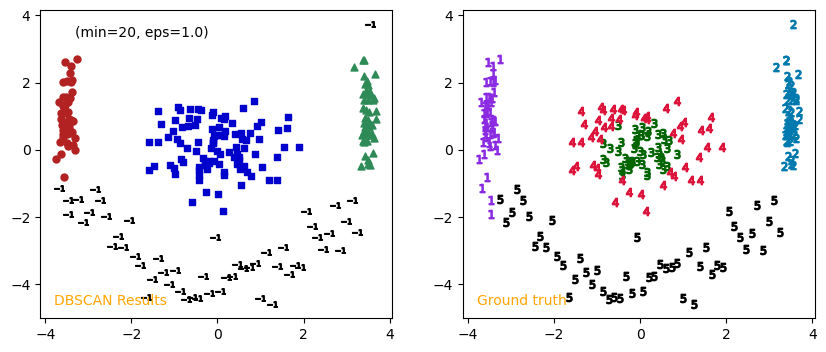

In [13]:
# two subplots: classificed v truth
fig, axs    = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs_obs     = axs[0]
axs_truth   = axs[1]

# Loop over all classification labels
for j_cl in np.unique(clustering_results.labels_):
    in_this_cluster = clustering_results.labels_ == j_cl
    if j_cl == -1:  # Not associated to any cluster
        themark = "$-1$"
        s       = 49.
    else:
        themark = plotmark[j_cl%len(plotmark)]
        s       = 25.
    _           = axs_obs.scatter(data_u[0][in_this_cluster], data_u[1][in_this_cluster], \
                                  color=plotcol[j_cl%len(plotcol)], marker=themark % j_cl, \
                                  s=s, label="$%d$" % j_cl)
_        = axs_obs.text(0.10,0.95, f"(min={kwargs['min_samples']}, eps={kwargs['eps']})", \
                        ha='left', va='top', transform=axs_obs.transAxes)
_        = axs_obs.text(0.04, 0.08, 'DBSCAN Results', ha='left', va='top', \
                        color='orange', transform=axs_obs.transAxes)

# Plot the truth in a separate panel
_        = axs_truth.scatter(x1, y1, c="blueviolet", marker="$1$")
_        = axs_truth.scatter(x2, y2, c="#0079AE",    marker="$2$")
_        = axs_truth.scatter(x3, y3, c="darkgreen",  marker="$3$")
_        = axs_truth.scatter(x4, y4, c="crimson",    marker="$4$")
_        = axs_truth.scatter(x5, y5, c="k",          marker="$5$")
axs_truth.text(0.04, 0.08, 'Ground truth', ha='left', va='top', \
               color='orange', transform=axs_truth.transAxes)



### Hierarchael Clustering

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, leaders

In [15]:
# Function to plot a dendrogram. 
def plot_dendrogram(the_linkage, cluster_method, d_max=None):
    """Function to plot a dendrogram.  
    Inputs are a linkage, a methodology (e.g. ward) and a limit in distance"""
    fig = plt.figure(figsize=(xsize*2., ysize))
    # add the subplots one at a time because dendrogram() will just plot in the current axis
    axL = fig.add_subplot(1,2,1)
    _   = axL.set_title('Hierarchical Clustering Dendrogram: %s' % cluster_method)
    _   = axL.set_xlabel('sample index')
    _   = axL.set_ylabel('distance')
    dendrogram(
        the_linkage,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    axR = fig.add_subplot(1,2,2)
    _   = axR.plot(the_linkage[:,2])

    if d_max is not None:
      # freeze the current xlimits
      xlimits = axL.get_xlim()
      _       = axL.plot(xlimits, np.array([d_max, d_max]), linestyle='-', color="#777777")
      _       = axL.set_xlim(xlimits)
      # freeze the current ylimits
      xlimits = axR.get_xlim()
      _       = axR.plot(xlimits, np.array([d_max, d_max]), linestyle='-', color="#777777")
      _       = axR.set_xlim(xlimits)

    _    = axR.set_xlabel('iteration')
    _    = axR.set_ylabel('distance')

    _    = fig.tight_layout()
    return fig


#### Determine the clusters

In [16]:
cluster_method = 'ward'
the_linkage    = linkage(data_u.T, cluster_method)

In [17]:
the_linkage[0,:]

array([7.30000000e+01, 9.10000000e+01, 8.09311694e-03, 2.00000000e+00])

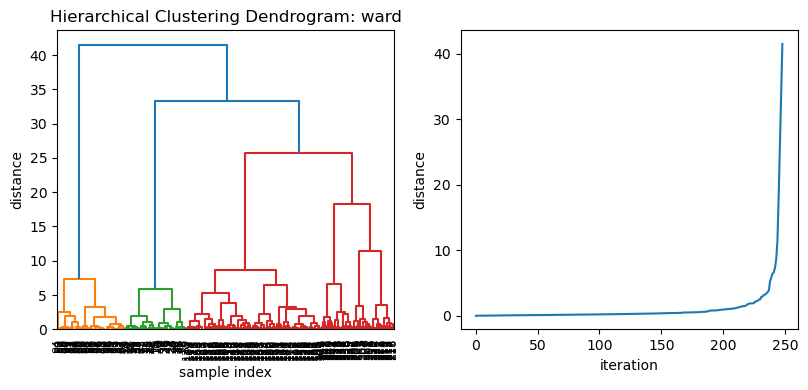

In [18]:
fig               = plot_dendrogram(the_linkage, cluster_method)

In [19]:
# Force a maximum of 4 clusters
n_clusters_max    = 4
first_cut_linkage = the_linkage[(the_linkage[:,3] <= n_clusters_max)]
# to find the exact distance at which there are 4 clusters, start at the top of the tree and move down
d_guess           = first_cut_linkage[:,2][-1] + .01
# if we don't need the actual distance we can just tell it to return 4 clusters
# (but it doesn't then return the distance)
clusters_all      = fcluster(the_linkage, n_clusters_max, criterion="maxclust")
this_leader       = leaders(the_linkage, clusters_all)
i_top             = np.where(this_leader[1] == n_clusters_max)
i_cut             = the_linkage[:,1] == this_leader[0][i_top[0]]

d_guess           = the_linkage[:,2][i_cut]


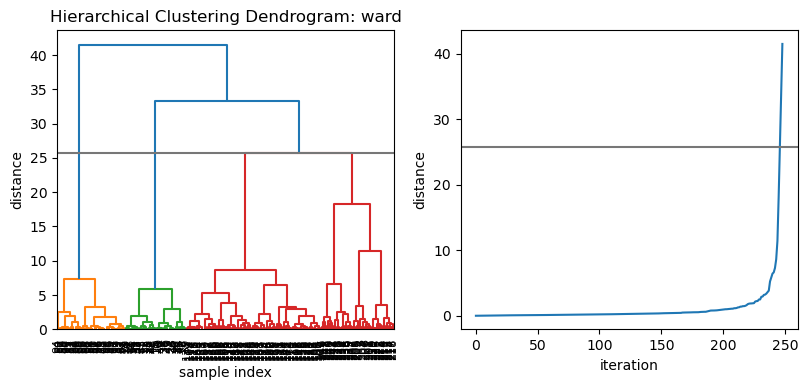

In [20]:
fig               = plot_dendrogram(the_linkage, cluster_method, d_max=d_guess)


#### Plot the results

Text(0.04, 0.08, 'Ground truth')

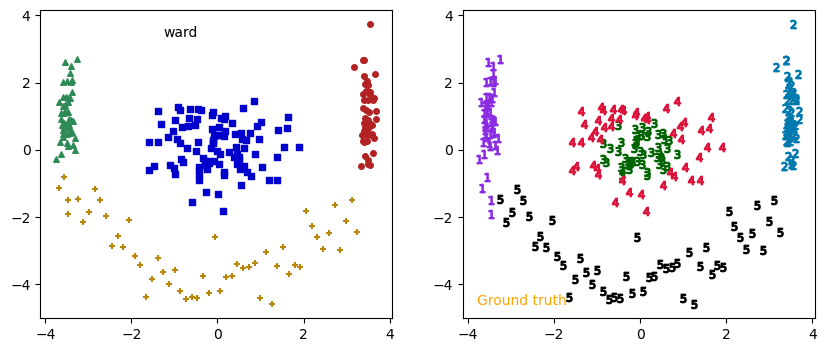

In [21]:
# two subplots: classificed v truth
fig, axs    = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs_obs     = axs[0]
axs_truth   = axs[1]
label_n_pos = [0.35, 0.95]

n_cl        = np.max(clusters_all)
for i_cl in range(n_cl):
    in_this_cluster = clusters_all == i_cl+1
    _               = axs_obs.scatter(data_u[0][in_this_cluster], data_u[1][in_this_cluster],
                                      color=plotcol[i_cl%len(plotcol)], \
                                      marker=plotmark[i_cl%len(plotmark)],
                                      s=16., label="$%d$" % i_cl)
_           = axs_obs.text(label_n_pos[0], label_n_pos[1], cluster_method, \
                           ha='left', va='top', transform=axs_obs.transAxes)

# Plot the truth in a separate panel
_        = axs_truth.scatter(x1, y1, c="blueviolet", marker="$1$")
_        = axs_truth.scatter(x2, y2, c="#0079AE",    marker="$2$")
_        = axs_truth.scatter(x3, y3, c="darkgreen",  marker="$3$")
_        = axs_truth.scatter(x4, y4, c="crimson",    marker="$4$")
_        = axs_truth.scatter(x5, y5, c="k",          marker="$5$")
axs_truth.text(0.04, 0.08, 'Ground truth', ha='left', va='top', \
               color='orange', transform=axs_truth.transAxes)


### K-means

In [22]:
from sklearn.cluster import KMeans
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [23]:
def run_kmeans(the_data, n_clusters):
    """Function to run the Kmeans clustering algorithm given a dataset required number of clusters"""
    # KMeans requires data of the form
    # [[x1, y1], [x2, y2], ..., [xn, yn]]
    # whereas the_data looks like
    # [[x1, ..., xn], [y1, ..., yn]]
    # so we need to use the transpose of the_dat
    kmeans   = KMeans(n_clusters=n_clusters, random_state=0)
    _        = kmeans.fit(the_data.T)
    score    = kmeans.score(the_data.T)
    return kmeans, score

def plot_kmeans(the_data, n_clusters, kmeans, score, label_n=None, label_n_pos=None):
    """Function to run the Kmeans clustering algorithm given a dataset required number of clusters"""
    fig, ax  = plt.subplots(figsize=the_figsize)
    for i in range(n_clusters):
        _    = ax.scatter(the_data[0][kmeans.labels_ == i], the_data[1][kmeans.labels_== i],\
                          color=plotcol[i%len(plotcol)], marker=plotmark[i%len(plotmark)],\
                          s=16., label="$%d$" % i)
    _        = ax.scatter(kmeans.cluster_centers_.T[0], kmeans.cluster_centers_.T[1], \
                           marker="X", color="k", s=100.)
    _        = ax.set_xlabel("x")
    _        = ax.set_ylabel("y")
    if label_n:
        if label_n_pos is None:
            label_n_pos = [0.8, 0.9]
            _   = fig.text(label_n_pos[0], label_n_pos[1], "K = %d" % n_clusters, \
                           ha='left', va='top', transform=ax.transAxes)
    _           = fig.tight_layout()
    return fig

In [24]:
n_clusters     = 5
kmeans, score  = run_kmeans(data_u, n_clusters)

In [25]:
kmeans.cluster_centers_

array([[-0.06092227,  0.10433351],
       [-2.32401013, -2.59131279],
       [ 3.41412547,  0.98144187],
       [-3.50156913,  1.02563805],
       [ 1.1008418 , -3.30468026]])

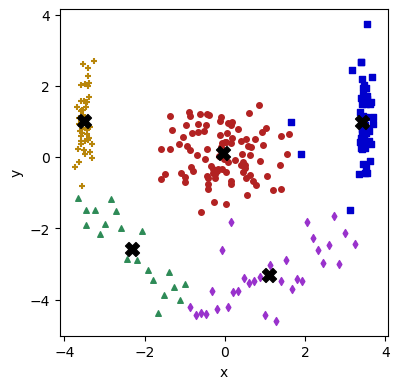

In [26]:
fig = plot_kmeans(data_u, n_clusters, kmeans, score)

## Classification

### K-nearest neighbours

In [27]:
from sklearn.neighbors import KNeighborsClassifier
# in addition to the documentation for sklearn's package, see e.g. https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

In [28]:
k     = 100
knn   = KNeighborsClassifier(n_neighbors=k)
_     = knn.fit(data_u.T, labels)

In [29]:
knn.predict([[0.1,0.1], [1,1]])

array([3, 3])

### Plot the results

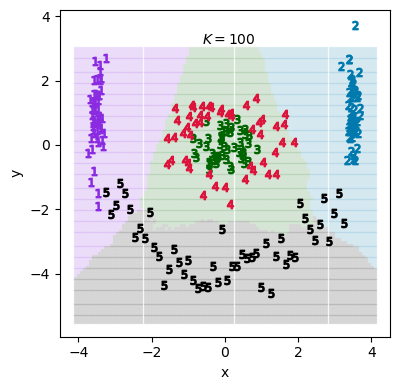

In [30]:
x_grid         = np.linspace(-4.1, 4.1, num=100)
y_grid         = np.linspace(-5.5, 3.0, num=100)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
xy_mesh        = np.array([x_mesh.flatten(), y_mesh.flatten()]).T
xy_predict     = knn.predict(xy_mesh)

xsize, ysize   = the_figsize # break out of the tuple
classcolors    = ["blueviolet", "#0079AE", "darkgreen", "crimson", "k"]
fig, ax        = plt.subplots(ncols=1, nrows=1, figsize=(xsize, ysize), sharex=True, sharey=True)

all_labels     = [1, 2, 3, 4, 5]

for j_label in all_labels:
    i_thislabel = xy_predict == j_label
    this_xymesh = xy_mesh[i_thislabel].T
    _           = ax.scatter(this_xymesh[0], this_xymesh[1], c=classcolors[j_label-1], \
                             s=1., marker="s", alpha=0.1)

_               = ax.scatter(x1, y1, c=classcolors[0], marker="$1$")
_               = ax.scatter(x2, y2, c=classcolors[1], marker="$2$")
_               = ax.scatter(x3, y3, c=classcolors[2], marker="$3$")
_               = ax.scatter(x4, y4, c=classcolors[3], marker="$4$")
_               = ax.scatter(x5, y5, c=classcolors[4], marker="$5$")

_               = ax.text(0.43, 0.93, f"$K={k}$", ha='left', va='top', transform=ax.transAxes)

_               = ax.set_ylabel("y")
_               = ax.set_xlabel("x")
_               = fig.tight_layout()

plt.show()

***